In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=16)
sns.set_style('darkgrid')

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.drop(columns=['Cabin'], inplace=True)
train.dropna(subset=['Embarked'], inplace=True)

In [8]:
test.drop(columns=['Cabin'], inplace=True)
test.dropna(subset=['Embarked','Fare'], inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
def convert_embarked(x):
    if x == "C":
        return "Cherbourg"
    elif x == 'Q':
        return "Queenstown"
    elif x == 'S':
        return "Southampton"
train.Embarked = train.Embarked.map(convert_embarked)
test.Embarked = train.Embarked.map(convert_embarked)

In [14]:
train['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']


<AxesSubplot:xlabel='FamilySize'>

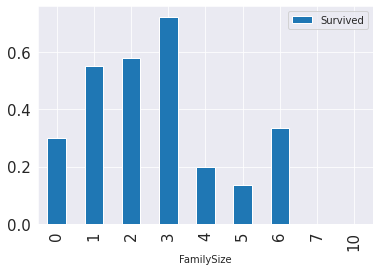

In [16]:
train.groupby('FamilySize').agg({"Survived" : 'mean'}).plot(kind='bar')

In [17]:
train.drop(columns=['PassengerId','Ticket'], inplace=True)
test.drop(columns=['PassengerId','Ticket'], inplace=True)

In [18]:
train['Title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

In [19]:
train['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Mme               1
the Countess      1
Jonkheer          1
Don               1
Sir               1
Ms                1
Lady              1
Name: Title, dtype: int64

In [20]:
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,Southampton,1,Mr
1,1,1,female,38.0,1,0,71.2833,Cherbourg,1,Mrs
2,1,3,female,26.0,0,0,7.9250,Southampton,0,Miss
3,1,1,female,35.0,1,0,53.1000,Southampton,1,Mrs
4,0,3,male,35.0,0,0,8.0500,Southampton,0,Mr


In [22]:
train['Pclass'] = train['Pclass'].astype(str)
test['Pclass'] = test['Pclass'].astype(str)

In [23]:
train = pd.get_dummies(train, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex','Embarked','Pclass','Title'], drop_first=True)

In [24]:
train.dtypes

Survived                  int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
FamilySize                int64
Sex_male                  uint8
Embarked_Queenstown       uint8
Embarked_Southampton      uint8
Pclass_2                  uint8
Pclass_3                  uint8
Title_Col                 uint8
Title_Don                 uint8
Title_Dr                  uint8
Title_Jonkheer            uint8
Title_Lady                uint8
Title_Major               uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mlle                uint8
Title_Mme                 uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Ms                  uint8
Title_Rev                 uint8
Title_Sir                 uint8
Title_the Countess        uint8
dtype: object

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
# train
impute_train = train[train.Age.isnull()].drop(['Age'], axis=1)
impute_train.describe()

,Survived,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.0,177.0,177.000000,177.000000,177.0,177.0,177.0,177.0
mean,0.293785,0.564972,0.180791,22.158567,0.745763,0.700565,0.276836,0.508475,0.062147,0.768362,...,0.022599,0.203390,0.0,0.0,0.672316,0.096045,0.0,0.0,0.0,0.0
std,0.456787,1.626316,0.534145,31.874608,2.052658,0.459310,0.448704,0.501346,0.242107,0.423076,...,0.149042,0.403662,0.0,0.0,0.470700,0.295489,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,8.050000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
75%,1.000000,0.000000,0.000000,24.150000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
max,1.000000,8.000000,2.000000,227.525000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0


In [27]:
# test
impute_test = test[test.Age.isnull()].drop(['Age'], axis=1)
impute_test.describe()

,SibSp,Parch,Fare,FamilySize,Sex_male,Pclass_2,Pclass_3,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.0,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.313953,0.372093,15.017055,0.686047,0.709302,0.05814,0.837209,0.0,0.0,0.046512,0.162791,0.662791,0.116279,0.011628,0.0
std,0.973310,1.471666,14.184527,1.953950,0.456748,0.23538,0.371340,0.0,0.0,0.211825,0.371340,0.475530,0.322439,0.107833,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,7.750000,0.000000,0.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,7.972900,0.000000,1.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,15.559400,0.000000,1.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,8.000000,9.000000,69.550000,10.000000,1.000000,1.00000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [28]:
# train
knr = KNeighborsRegressor()
titanic_knn_train = train[train.Age.notnull()]
X_train = titanic_knn_train.drop(['Age'], axis = 1)
y_train = titanic_knn_train.Age

In [29]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
imputed_train_ages = knr.predict(impute_train)
imputed_train_ages

array([47.8  , 29.8  , 18.4  , 32.8  , 17.6  , 33.   , 21.584, 17.6  ,
       24.6  , 28.7  , 30.3  , 31.4  , 17.6  , 27.   , 49.4  , 46.7  ,
        8.334, 33.   , 30.3  , 17.6  , 30.3  , 30.3  , 33.   , 32.6  ,
       22.   , 30.3  , 47.8  , 17.4  , 27.   , 34.8  , 27.6  , 34.2  ,
       29.2  , 58.8  , 14.2  , 39.   , 40.   , 45.4  , 28.8  , 47.8  ,
       17.6  , 34.2  , 47.8  , 33.   , 12.6  , 26.6  , 17.1  , 18.9  ,
       34.8  , 39.8  , 47.8  , 21.5  , 45.6  , 17.6  , 36.6  , 58.8  ,
       46.7  , 43.4  , 17.6  , 29.6  , 29.   , 30.3  , 25.6  , 34.2  ,
       24.4  , 40.4  , 33.   , 29.6  , 50.4  , 32.8  , 17.6  , 17.6  ,
       31.4  , 18.4  , 17.6  , 36.4  , 33.   , 44.4  , 12.6  , 33.   ,
       40.1  , 36.6  , 25.4  , 28.7  , 34.8  , 47.8  , 29.6  , 26.   ,
       26.   , 30.3  , 40.6  , 47.8  , 30.3  , 36.6  , 44.4  , 34.8  ,
       41.   , 36.6  , 12.6  , 26.   , 22.4  , 30.3  , 20.3  , 41.2  ,
       30.3  , 41.6  , 32.8  , 29.9  , 30.8  , 29.9  , 24.   , 33.5  ,
      

In [31]:
# test
knr = KNeighborsRegressor()
titanic_knn_test = test[test.Age.notnull()]
X_test = titanic_knn_test.drop(['Age'], axis = 1)
y_test = titanic_knn_test.Age

In [32]:
X_test.isnull().sum()
knr.fit(X_test, y_test)
imputed_test_ages = knr.predict(impute_test)
imputed_test_ages


array([25.2  , 37.2  , 28.8  , 22.   , 23.   , 37.4  , 42.6  , 23.6  ,
       33.7  , 32.8  , 27.   , 27.8  , 25.2  , 22.   , 34.1  , 27.4  ,
       25.   , 27.8  , 23.6  , 23.6  , 22.6  , 25.8  , 24.   , 22.6  ,
       23.6  , 24.8  , 26.384, 22.9  , 41.4  , 42.6  , 25.2  , 24.4  ,
       24.   , 44.5  , 26.   , 22.7  , 23.6  , 38.1  , 40.   , 28.4  ,
       23.7  , 40.   , 24.   , 23.4  , 27.8  , 18.066, 27.4  , 25.   ,
       25.2  , 19.6  , 26.8  , 26.   , 23.6  , 25.2  , 26.4  , 26.   ,
       23.   , 23.6  , 15.2  , 23.4  , 27.4  , 29.   , 22.7  , 27.8  ,
       36.4  , 22.7  , 28.8  , 31.4  , 27.4  , 26.   , 23.4  , 22.7  ,
       34.3  ,  5.116, 25.   , 23.6  , 34.3  , 34.1  , 23.6  , 33.5  ,
       30.   , 24.4  , 27.4  , 27.8  , 27.8  , 16.4  ])

In [33]:
# test
impute_test['Age'] = imputed_test_ages

In [34]:
# train
impute_train['Age'] = imputed_train_ages

In [35]:
impute_train.head(10)

,Survived,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Age
5,0,0,0,8.4583,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,47.800
17,1,0,0,13.0000,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,29.800
19,1,0,0,7.2250,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,18.400
26,0,0,0,7.2250,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,32.800
28,1,0,0,7.8792,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,17.600
29,0,0,0,7.8958,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,33.000
31,1,1,0,146.5208,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,21.584
32,1,0,0,7.7500,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,17.600
36,1,0,0,7.2292,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,24.600
42,0,0,0,7.8958,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,28.700


In [36]:
# train
titanic_train_imputed = pd.concat([titanic_knn_train, impute_train], sort=False, axis=0)
train = titanic_train_imputed

In [37]:
# test
titanic_test_imputed = pd.concat([titanic_knn_test, impute_test], sort=False, axis=0)
test = titanic_test_imputed

In [38]:
train.isnull().sum()

Survived                0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
FamilySize              0
Sex_male                0
Embarked_Queenstown     0
Embarked_Southampton    0
Pclass_2                0
Pclass_3                0
Title_Col               0
Title_Don               0
Title_Dr                0
Title_Jonkheer          0
Title_Lady              0
Title_Major             0
Title_Master            0
Title_Miss              0
Title_Mlle              0
Title_Mme               0
Title_Mr                0
Title_Mrs               0
Title_Ms                0
Title_Rev               0
Title_Sir               0
Title_the Countess      0
dtype: int64

In [39]:
train['Age'].describe()

count    889.000000
mean      30.127003
std       13.773981
min        0.420000
25%       21.000000
50%       29.600000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
# train
train['Age'] = np.round(train['Age']).astype(int)

In [41]:
# test
test['Age'] = np.round(test['Age']).astype(int)


In [42]:
train['Age'].value_counts()

30    53
18    43
24    35
33    34
22    31
      ..
0      1
66     1
53     1
12     1
80     1
Name: Age, Length: 71, dtype: int64

<AxesSubplot:>

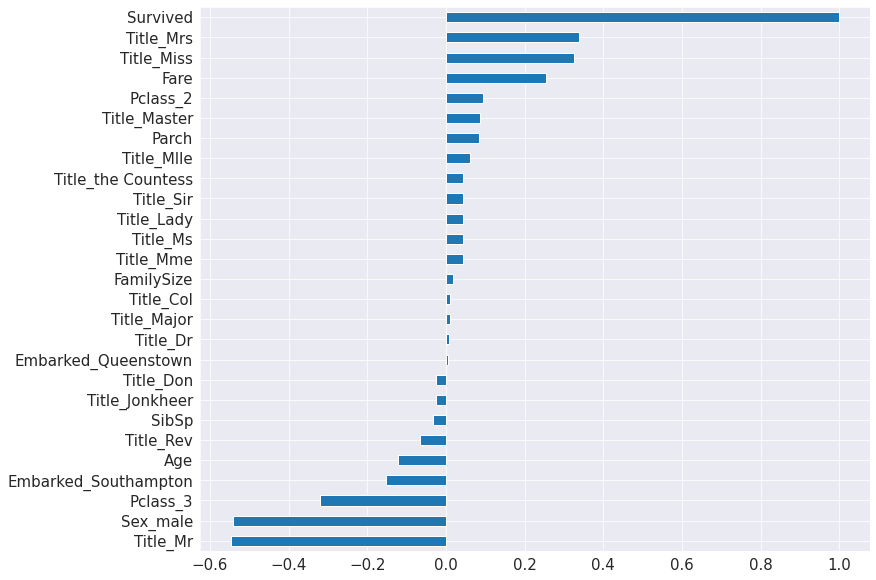

In [43]:
plt.figure(figsize = (12,10))
train.corr()['Survived'].sort_values(ascending = True).plot(kind = 'barh')

In [44]:
train.corr()['Survived'].sort_values(ascending = False)

Survived                1.000000
Title_Mrs               0.337892
Title_Miss              0.326352
Fare                    0.255290
Pclass_2                0.095002
Title_Master            0.085998
Parch                   0.083151
Title_Mlle              0.060339
Title_the Countess      0.042642
Title_Sir               0.042642
Title_Lady              0.042642
Title_Ms                0.042642
Title_Mme               0.042642
FamilySize              0.018277
Title_Col               0.011485
Title_Major             0.011485
Title_Dr                0.008454
Embarked_Queenstown     0.004536
Title_Don              -0.026409
Title_Jonkheer         -0.026409
SibSp                  -0.034040
Title_Rev              -0.064871
Age                    -0.121004
Embarked_Southampton   -0.151777
Pclass_3               -0.320171
Sex_male               -0.541585
Title_Mr               -0.547689
Name: Survived, dtype: float64

In [45]:
top_6 = train.corr()['Survived'].sort_values(ascending = False).keys()[0:7]
print (top_6)

Index(['Survived', 'Title_Mrs', 'Title_Miss', 'Fare', 'Pclass_2',
       'Title_Master', 'Parch'],
      dtype='object')


,Survived,Title_Mrs,Title_Miss,Fare,Pclass_2,Title_Master,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.139483,0.203600,32.096681,0.206974,0.044994,0.382452
std,0.486260,0.346644,0.402901,49.697504,0.405365,0.207408,0.806761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,512.329200,1.000000,1.000000,6.000000


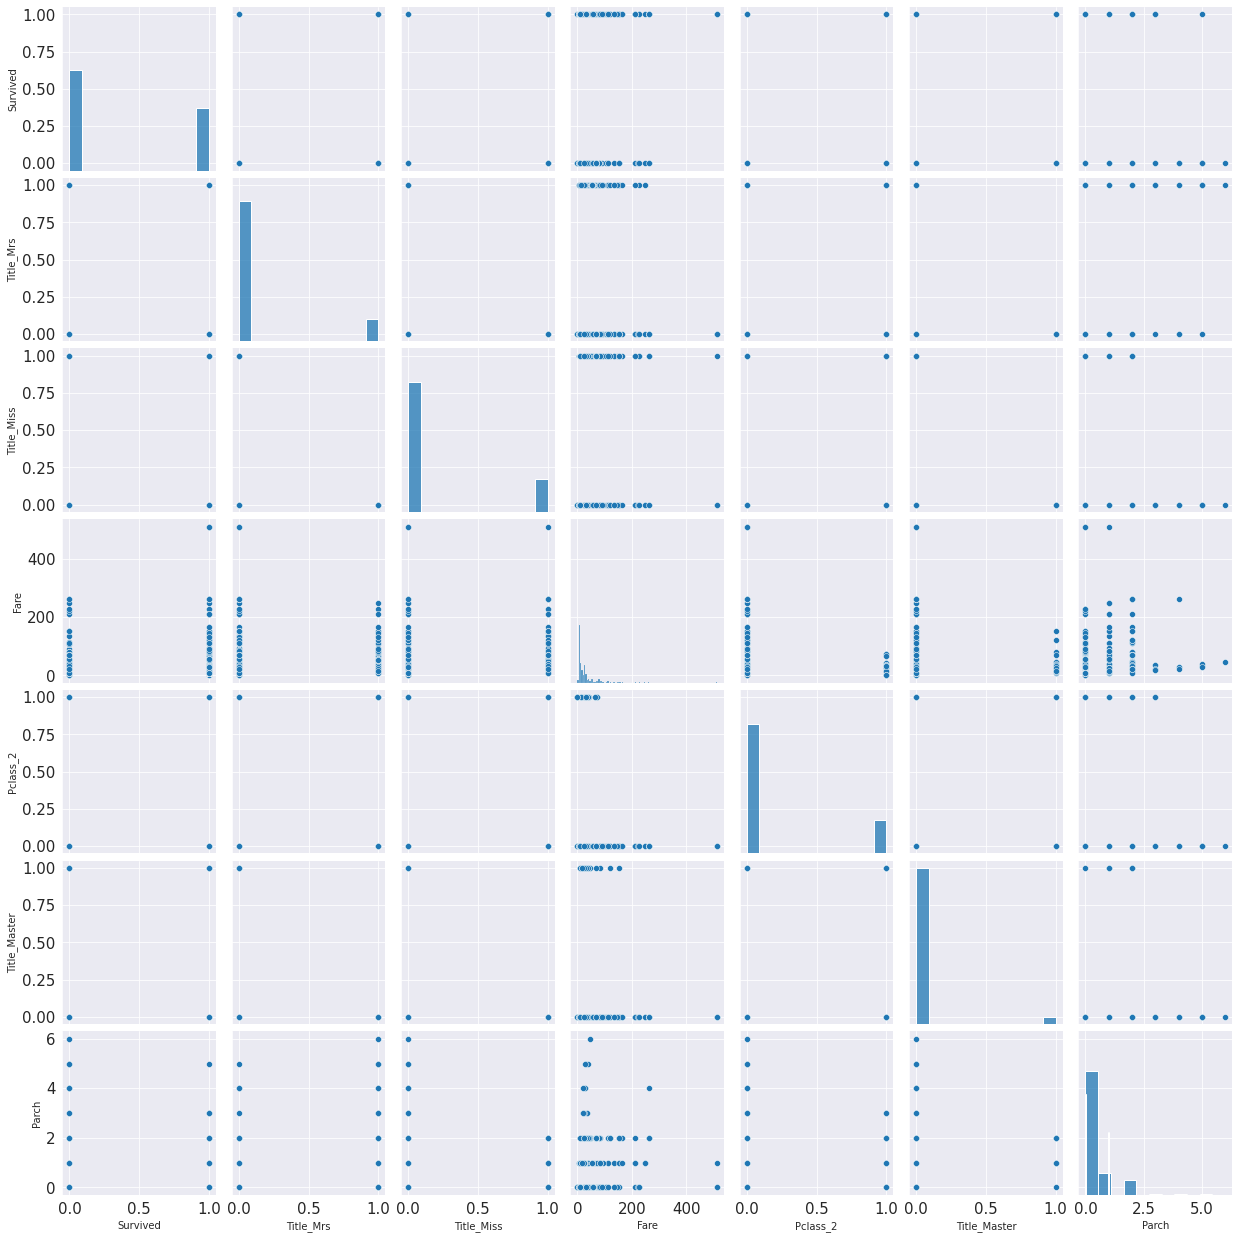

In [46]:
top_6_train = train.loc[:,top_6].copy()
top_6_train.head()
sns.pairplot(top_6_train)
top_6_train['Survived'].hist(bins=40)
top_6_train.describe()

In [47]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [48]:
y = train['Survived']

In [49]:
X = train.loc[:, ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Queenstown', 'Embarked_Southampton', 'Pclass_2', 'Pclass_3', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess']]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
X.shape, y.shape

((889, 26), (889,))

In [53]:
X_test.shape, y_test.shape

((267, 26), (267,))

In [54]:
scaler = StandardScaler()

In [55]:
X_scaled = scaler.fit_transform(X_train)

In [56]:
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])

In [57]:
X_train

,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,-0.885524,-0.467125,-0.463389,-0.418093,-0.558271,0.721653,-0.295656,0.613275,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
1,1.245490,-0.467125,-0.463389,-0.497440,-0.558271,0.721653,3.382307,-1.630590,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
2,0.251017,0.473172,-0.463389,-0.111289,0.081222,0.721653,-0.295656,0.613275,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
3,1.174456,-0.467125,-0.463389,-0.011930,-0.558271,0.721653,-0.295656,-1.630590,-0.506523,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
4,-0.885524,-0.467125,0.768354,-0.463585,0.081222,-1.385708,-0.295656,0.613275,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,-1.195695,2.530763,0.0,-0.056796,-0.040129,-0.040129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.179983,-0.467125,-0.463389,-0.508548,-0.558271,0.721653,-0.295656,-1.630590,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
618,2.026862,-0.467125,-0.463389,-0.111289,-0.558271,0.721653,-0.295656,0.613275,-0.506523,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
619,2.026862,-0.467125,-0.463389,-0.508019,-0.558271,0.721653,-0.295656,0.613275,-0.506523,0.910720,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129
620,0.393084,-0.467125,-0.463389,-0.389000,-0.558271,0.721653,-0.295656,-1.630590,1.974244,-1.098032,...,-0.217113,-0.501507,-0.040129,-0.040129,0.836333,-0.395138,0.0,-0.056796,-0.040129,-0.040129


In [58]:
X_scaled = scaler.transform(X_test)

In [59]:
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])

In [60]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [61]:
pred_y = lr.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [63]:
accuracy_score(y_test,pred_y)

0.8389513108614233

In [64]:
confusion_matrix(y_test, pred_y)


array([[148,  23],
       [ 20,  76]])

In [65]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       171
           1       0.77      0.79      0.78        96

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



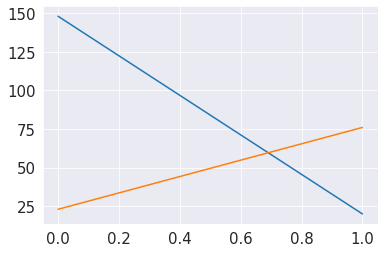

In [66]:
plt.plot(confusion_matrix(y_test, pred_y))
plt.show()

In [67]:
train['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [68]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [69]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8440514469453376, 0.8239700374531835)

In [70]:
y_dt = dt.predict(X_test)

In [71]:
accuracy_score(y_test,y_dt)

0.8239700374531835

In [72]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       171
           1       0.74      0.78      0.76        96

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267



In [73]:
from sklearn.svm import SVC

In [74]:
svm = SVC()

In [75]:
svm.fit(X_train,y_train)

SVC()

In [76]:
y_svm = svm.predict(X_test)

In [77]:
accuracy_score(y_test,y_svm)

0.846441947565543

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 8)

In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [81]:
y_rfc = rfc.predict(X_test)

In [82]:
accuracy_score(y_test,y_rfc)

0.850187265917603